<a href="https://colab.research.google.com/github/chrisalpuerto/Bball-shot-Detection/blob/main/BasketballMLModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Basketball Detection Test Run Using PyTorch**

In [1]:
!pip install ultralytics roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 34.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.9/86.9 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 117.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 102.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 125.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 97.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 64.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.

Import Dataset

In [2]:
from roboflow import Roboflow

rf = Roboflow(api_key="kSbyldBcppeFTfZOiAQr")
project = rf.workspace("train-apozl").project("basketball-ffnzz-ouegp")
version = project.version(1)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to basketball-1 in yolov8:: 100%|██████████| 806/806 [00:00<00:00, 5458.14it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


Import YOLO to import pretrained Model. We will use pretrained model for now, because of its ability to detect basketballs and hoops faster with less data

In [3]:
from ultralytics import YOLO

In [4]:
model = YOLO("yolov8n.pt")

100%|██████████| 6.25M/6.25M [00:00<00:00, 85.9MB/s]


In [5]:
print(dataset.location)

/content/basketball-1


In [6]:
!ls /content/basketball-1

data.yaml  README.dataset.txt  README.roboflow.txt  train


In [7]:
import os, shutil
from sklearn.model_selection import train_test_split

# Paths
base_path = "/content/basketball-1"
train_images = os.path.join(base_path, "train", "images")
train_labels = os.path.join(base_path, "train", "labels")

# Get all image files
images = os.listdir(train_images)
train_files, val_files = train_test_split(images, test_size=0.2, random_state=42)

# Create new valid/ folders
os.makedirs(os.path.join(base_path, "valid", "images"), exist_ok=True)
os.makedirs(os.path.join(base_path, "valid", "labels"), exist_ok=True)

# Move 20% of data into valid/
for file in val_files:
    shutil.move(os.path.join(train_images, file), os.path.join(base_path, "valid", "images", file))
    label_file = file.replace(".jpg", ".txt").replace(".png", ".txt")
    shutil.move(os.path.join(train_labels, label_file), os.path.join(base_path, "valid", "labels", label_file))


In [8]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")
model.train(data="/content/basketball-1/data.yaml", epochs=50)


Ultralytics 8.3.169 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/basketball-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrai

100%|██████████| 755k/755k [00:00<00:00, 19.4MB/s]

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

 16                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
 17            [-1, 12]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 18                  -1  1    123648  ultralytics.nn.modules.block.C2f             [192, 128, 1]                 
 19                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
 20             [-1, 9]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 21                  -1  1    493056  ultralytics.nn.modules.block.C2f             [384, 256, 1]                 
 22        [15, 18, 21]  1    751507  ultralytics.nn.modules.head.Detect           [1, [64, 128, 256]]           
Model summary: 129 layers, 3,011,043 parameters, 3,011,027 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed

100%|██████████| 5.35M/5.35M [00:00<00:00, 82.7MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 912.3±377.4 MB/s, size: 26.1 KB)


train: Scanning /content/basketball-1/train/labels... 320 images, 0 backgrounds, 0 corrupt: 100%|██████████| 320/320 [00:00<00:00, 2431.58it/s]

train: New cache created: /content/basketball-1/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 6, len(boxes) = 348. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 413.5±177.4 MB/s, size: 24.6 KB)


val: Scanning /content/basketball-1/valid/labels... 80 images, 0 backgrounds, 0 corrupt: 100%|██████████| 80/80 [00:00<00:00, 1443.49it/s]

val: New cache created: /content/basketball-1/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.02G      1.046      2.906      1.232         25        640: 100%|██████████| 20/20 [00:08<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.35it/s]

                   all         80         86    0.00333       0.93      0.393      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50       2.5G      1.205      2.063      1.212         44        640: 100%|██████████| 20/20 [00:05<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.17it/s]

                   all         80         86    0.00405      0.535      0.348      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.52G      1.224      1.923      1.245         31        640: 100%|██████████| 20/20 [00:04<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.95it/s]

                   all         80         86      0.626      0.136      0.288      0.143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.54G      1.175      1.792       1.25         36        640: 100%|██████████| 20/20 [00:04<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.36it/s]

                   all         80         86      0.815      0.359      0.426       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.55G      1.266      1.915       1.27         21        640: 100%|██████████| 20/20 [00:04<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.05it/s]

                   all         80         86      0.493      0.291      0.296      0.143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.57G      1.201      1.582      1.253         31        640: 100%|██████████| 20/20 [00:06<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.48it/s]

                   all         80         86      0.178      0.233      0.104     0.0431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.59G      1.306      1.672      1.274         29        640: 100%|██████████| 20/20 [00:04<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.95it/s]

                   all         80         86      0.255      0.256      0.208      0.111



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50       2.6G      1.246      1.566       1.26         23        640: 100%|██████████| 20/20 [00:05<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.45it/s]

                   all         80         86      0.506      0.581      0.473      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.62G      1.236       1.46      1.253         25        640: 100%|██████████| 20/20 [00:04<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.25it/s]

                   all         80         86      0.646      0.595      0.583      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.64G      1.169      1.315      1.212         31        640: 100%|██████████| 20/20 [00:04<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.32it/s]

                   all         80         86      0.781       0.57      0.702      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.65G      1.215      1.363      1.251         19        640: 100%|██████████| 20/20 [00:04<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.17it/s]


                   all         80         86      0.813      0.674       0.75      0.456

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.67G      1.121      1.242      1.185         27        640: 100%|██████████| 20/20 [00:04<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.13it/s]

                   all         80         86      0.833      0.686      0.771      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.69G      1.154      1.182       1.17         31        640: 100%|██████████| 20/20 [00:04<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.57it/s]

                   all         80         86      0.838      0.709      0.791      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.71G      1.147      1.136      1.216         22        640: 100%|██████████| 20/20 [00:04<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.29it/s]

                   all         80         86      0.908      0.685      0.824      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.72G      1.141      1.103      1.206         24        640: 100%|██████████| 20/20 [00:04<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.83it/s]

                   all         80         86      0.812      0.744      0.812       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.74G        1.1      1.027      1.198         33        640: 100%|██████████| 20/20 [00:04<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.54it/s]

                   all         80         86      0.815      0.721      0.788      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.76G      1.128      1.065      1.187         35        640: 100%|██████████| 20/20 [00:04<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.33it/s]

                   all         80         86      0.892      0.772      0.864      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.78G      1.038     0.9347      1.136         29        640: 100%|██████████| 20/20 [00:04<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.70it/s]

                   all         80         86      0.854      0.733       0.83      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.79G      1.063     0.9745      1.155         33        640: 100%|██████████| 20/20 [00:05<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.20it/s]


                   all         80         86      0.829      0.791      0.844      0.557

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.81G      1.041      0.991      1.138         27        640: 100%|██████████| 20/20 [00:04<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.86it/s]

                   all         80         86      0.802      0.756      0.816      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.83G      0.984     0.8601      1.121         33        640: 100%|██████████| 20/20 [00:05<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.62it/s]

                   all         80         86       0.78      0.791      0.871      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.84G     0.9554     0.8729      1.092         41        640: 100%|██████████| 20/20 [00:04<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.71it/s]

                   all         80         86      0.881      0.775      0.877      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.86G     0.9503     0.8372       1.11         24        640: 100%|██████████| 20/20 [00:05<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.88it/s]

                   all         80         86      0.827      0.778      0.845      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.88G     0.9321     0.8092      1.079         21        640: 100%|██████████| 20/20 [00:04<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.20it/s]

                   all         80         86      0.897       0.86      0.889      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.89G     0.9358     0.8317      1.123         35        640: 100%|██████████| 20/20 [00:06<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.01it/s]

                   all         80         86      0.856      0.828      0.879      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.91G     0.9127     0.7888      1.088         22        640: 100%|██████████| 20/20 [00:04<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.91it/s]

                   all         80         86      0.889      0.802      0.876      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.93G      0.913     0.7475      1.083         21        640: 100%|██████████| 20/20 [00:05<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.68it/s]

                   all         80         86      0.849      0.814      0.886      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.95G     0.9252     0.7982      1.087         32        640: 100%|██████████| 20/20 [00:04<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.84it/s]

                   all         80         86       0.79      0.837      0.848      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.96G     0.8945     0.7346      1.049         29        640: 100%|██████████| 20/20 [00:05<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.08it/s]

                   all         80         86      0.895      0.756      0.883      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.98G     0.8998     0.7485      1.064         32        640: 100%|██████████| 20/20 [00:04<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.45it/s]


                   all         80         86      0.875      0.811      0.894      0.653

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50         3G     0.9428     0.7901      1.071         21        640: 100%|██████████| 20/20 [00:05<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.26it/s]

                   all         80         86      0.899      0.791      0.899      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      3.01G     0.8653     0.6906      1.029         31        640: 100%|██████████| 20/20 [00:04<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.42it/s]

                   all         80         86      0.895      0.849       0.92      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      3.03G     0.8744     0.7016      1.071         20        640: 100%|██████████| 20/20 [00:05<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.85it/s]

                   all         80         86      0.915       0.88      0.907      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      3.05G      0.846     0.6832      1.043         31        640: 100%|██████████| 20/20 [00:04<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.03it/s]

                   all         80         86      0.922      0.826      0.904      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      3.06G     0.7923     0.6341      1.016         37        640: 100%|██████████| 20/20 [00:04<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.01it/s]

                   all         80         86       0.91      0.824      0.908      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      3.08G     0.8028      0.626      1.018         31        640: 100%|██████████| 20/20 [00:04<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.21it/s]

                   all         80         86      0.872      0.802      0.872      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50       3.1G     0.7993     0.6184      1.016         28        640: 100%|██████████| 20/20 [00:04<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.24it/s]

                   all         80         86      0.972      0.756      0.911      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      3.12G     0.7693     0.6419      1.018         24        640: 100%|██████████| 20/20 [00:04<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.59it/s]

                   all         80         86      0.985      0.777      0.928      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      3.13G     0.7365     0.6176      1.001         26        640: 100%|██████████| 20/20 [00:04<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.63it/s]


                   all         80         86      0.967      0.791      0.921      0.683

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      3.15G     0.8114     0.6449      1.012         33        640: 100%|██████████| 20/20 [00:05<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.30it/s]

                   all         80         86      0.894      0.786      0.917      0.688


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      3.17G     0.7671     0.5784     0.9763         16        640: 100%|██████████| 20/20 [00:05<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.44it/s]

                   all         80         86       0.93      0.814      0.906      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      3.19G     0.7492     0.5736     0.9811         18        640: 100%|██████████| 20/20 [00:04<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.94it/s]

                   all         80         86      0.958      0.814      0.918      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50       3.2G     0.7064     0.5351     0.9539         17        640: 100%|██████████| 20/20 [00:04<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.85it/s]

                   all         80         86      0.888       0.86      0.914      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      3.22G     0.7286     0.5105      0.967         16        640: 100%|██████████| 20/20 [00:04<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.48it/s]

                   all         80         86      0.925      0.872      0.914      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      3.24G     0.7039     0.4963     0.9435         16        640: 100%|██████████| 20/20 [00:04<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.19it/s]

                   all         80         86      0.953      0.907      0.932      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      3.25G     0.7124     0.5064     0.9623         16        640: 100%|██████████| 20/20 [00:05<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.02it/s]

                   all         80         86       0.97      0.895      0.937      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      3.27G     0.6818     0.4932     0.9241         16        640: 100%|██████████| 20/20 [00:04<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.41it/s]

                   all         80         86      0.987      0.871      0.933      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      3.29G     0.6671     0.4668     0.9315         16        640: 100%|██████████| 20/20 [00:05<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.50it/s]

                   all         80         86      0.986      0.849      0.924      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50       3.3G     0.6606     0.4698     0.9251         19        640: 100%|██████████| 20/20 [00:04<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.96it/s]

                   all         80         86      0.972      0.837      0.924      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      3.32G     0.6674     0.4725     0.9244         18        640: 100%|██████████| 20/20 [00:05<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.05it/s]

                   all         80         86       0.97      0.849      0.927      0.713



50 epochs completed in 0.089 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.169 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.71it/s]


                   all         80         86      0.971      0.837      0.924      0.718
Speed: 0.3ms preprocess, 2.5ms inference, 0.0ms loss, 3.3ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7bd89a0898d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [9]:
model = YOLO("runs/detect/train/weights/best.pt")
model.val()

Ultralytics 8.3.169 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 853.0±348.9 MB/s, size: 24.4 KB)


val: Scanning /content/basketball-1/valid/labels.cache... 80 images, 0 backgrounds, 0 corrupt: 100%|██████████| 80/80 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.83it/s]


                   all         80         86      0.975      0.837      0.924      0.718
Speed: 4.8ms preprocess, 8.1ms inference, 0.0ms loss, 5.7ms postprocess per image
Results saved to runs/detect/val


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7bd8a4483b10>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [10]:
# The model.val() method returns a metrics object
metrics = model.val()

# Accessing the accuracy metrics
print(f"mAP50: {metrics.box.map50}")
print(f"mAP50-95: {metrics.box.map}")

Ultralytics 8.3.169 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 765.6±225.6 MB/s, size: 20.9 KB)


val: Scanning /content/basketball-1/valid/labels.cache... 80 images, 0 backgrounds, 0 corrupt: 100%|██████████| 80/80 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.28it/s]


                   all         80         86      0.975      0.837      0.924      0.718
Speed: 4.7ms preprocess, 6.8ms inference, 0.0ms loss, 3.0ms postprocess per image
Results saved to runs/detect/val2
mAP50: 0.9237285421178025
mAP50-95: 0.7178403021422739


In [11]:
import cv2

!ls /content/basketball-1/train/images

In [12]:
import os
train_path1 = "/content/basketball-1/train/images"

images = os.listdir(train_path1)

In [13]:
print(images[:10])

['001404_jpg.rf.9ddf8453aacd3b39d485ea96fcd94342.jpg', 'wpic1075_jpg.rf.522697b38f6593765401aea04eeba327.jpg', 'bing50_jpg.rf.1f8cc0d217c4f4b20cfd40b9e74fb40b.jpg', 'Screenshot-2023-04-03-172201_png_jpg.rf.40ed8512a1ebed994b62a8a9aa3672ca.jpg', 'Screenshot-107-_png_jpg.rf.fd04788b1b6f57b8cab64e7f2a79d4e2.jpg', 'ball100_jpg.rf.dd11c5df02522c5667a92ec6eac19f71.jpg', 'bball30_jpg.rf.faef09e630660d3c65e1609da01981ae.jpg', 'ball56_jpg.rf.53dcab99a6c2766752c590f1dd589a89.jpg', 'WIN_20230331_17_27_56_Pro_jpg.rf.1dff1eb7cfaaee043440c624d052c658.jpg', 'Screenshot-116-_png_jpg.rf.9587c0b4115b5210af83132a9d72fcba.jpg']


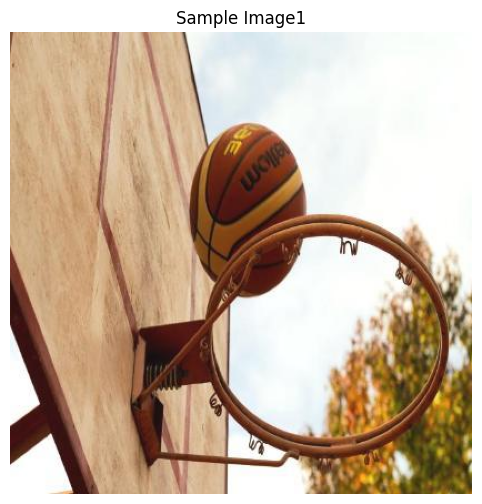

In [14]:
import matplotlib.pyplot as plt

image1 = images[1]
image_path1 = os.path.join(train_path1, image1)
# load with opencv
img1 = cv2.imread(image_path1)
img_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(8,6))
plt.imshow(img_rgb)
plt.axis('off')
plt.title('Sample Image1')
plt.show()


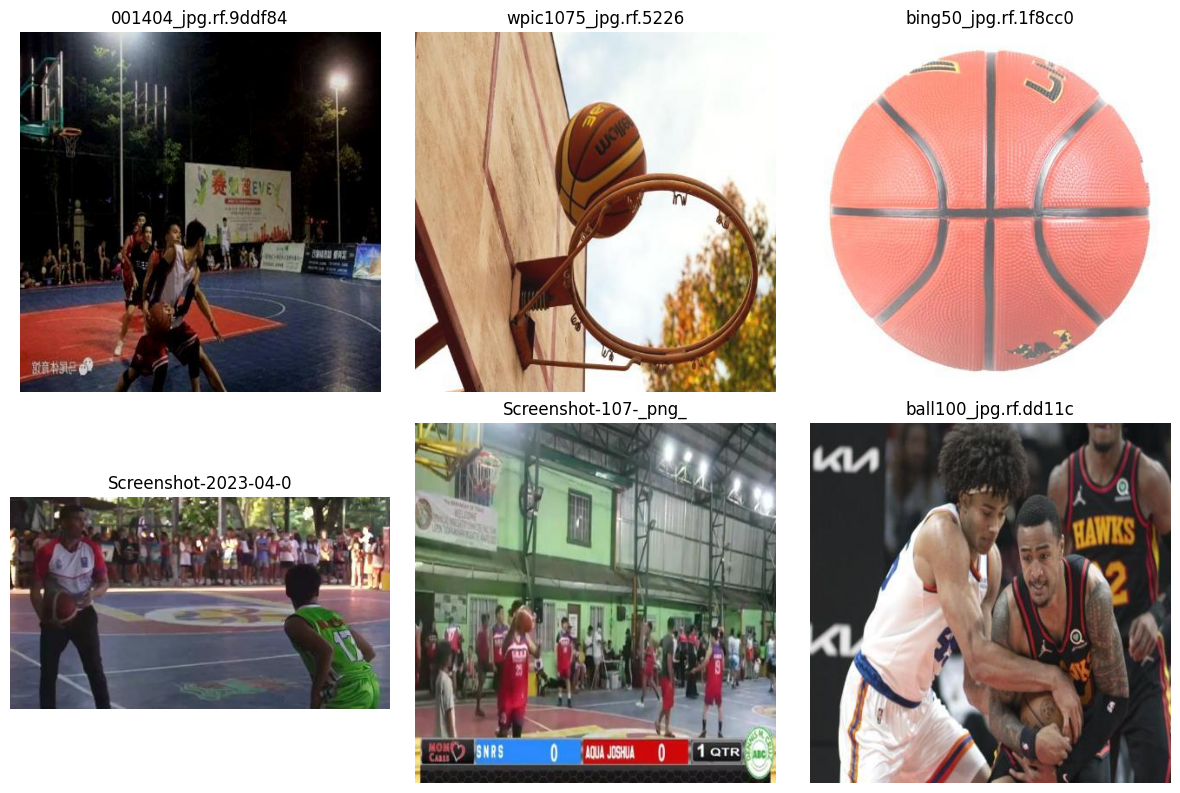

In [15]:
images = os.listdir(train_path1)[:6]  # Show first 6
plt.figure(figsize=(12, 8))

for i, fname in enumerate(images):
    img = cv2.imread(os.path.join(train_path1, fname))
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(2, 3, i+1)
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.title(fname[:20])

plt.tight_layout()
plt.show()

In [16]:
!ls runs

detect


In [17]:
!ls /content/basketball-1/train

images	labels	labels.cache


In [18]:
!ls runs/detect/train

args.yaml			 labels.jpg	     train_batch802.jpg
BoxF1_curve.png			 results.csv	     val_batch0_labels.jpg
BoxP_curve.png			 results.png	     val_batch0_pred.jpg
BoxPR_curve.png			 train_batch0.jpg    val_batch1_labels.jpg
BoxR_curve.png			 train_batch1.jpg    val_batch1_pred.jpg
confusion_matrix_normalized.png  train_batch2.jpg    val_batch2_labels.jpg
confusion_matrix.png		 train_batch800.jpg  val_batch2_pred.jpg
labels_correlogram.jpg		 train_batch801.jpg  weights


In [19]:
!ls runs/detect/train/weights

best.pt  last.pt


In [20]:
model = YOLO("runs/detect/train/weights/best.pt")

In [28]:
!ls /test_images1

ball1.jpeg  bball3.jpg	random1.jpg   random3.jpeg
bball2.jpg  bball4.png	random2.webp


In [29]:
!ls test_images1

ls: cannot access 'test_images1': No such file or directory


# Testing
Here I am testing my ML model on just 7 different pictures, 4 pictures of basketballs and 3 pictures of random objects. I will check how accurate my model is

In [30]:
test_images = "/test_images1"
test_path = os.listdir(test_images)
print(test_path[:4])

['bball2.jpg', 'bball3.jpg', 'random1.jpg', 'bball4.png']



image 1/1 /test_images1/bball2.jpg: 640x640 1 ball, 8.6ms
Speed: 3.4ms preprocess, 8.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Number of basketballs in bball2.jpg: 1


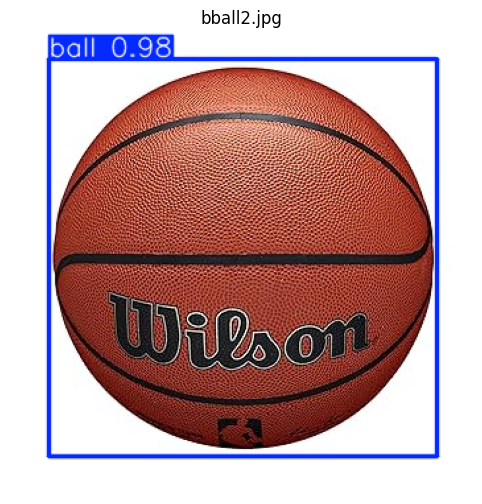


image 1/1 /test_images1/bball3.jpg: 640x416 1 ball, 54.5ms
Speed: 3.3ms preprocess, 54.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 416)
Number of basketballs in bball3.jpg: 1


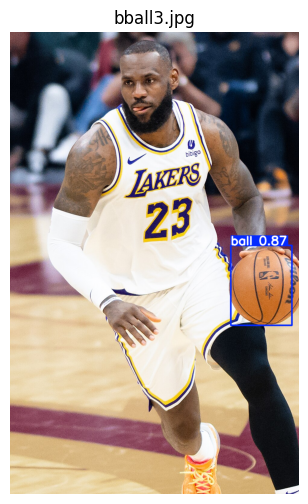


image 1/1 /test_images1/random1.jpg: 640x640 (no detections), 15.8ms
Speed: 6.1ms preprocess, 15.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
Number of basketballs in random1.jpg: 0


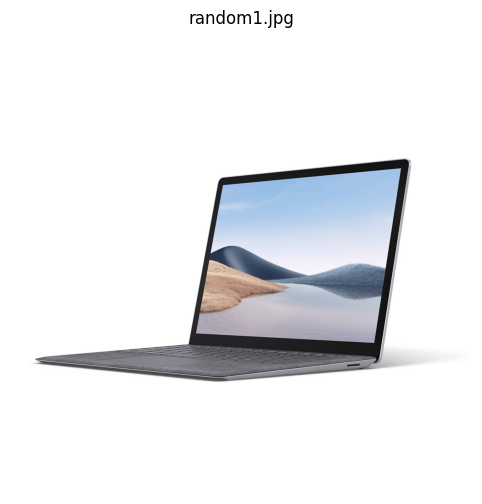


image 1/1 /test_images1/bball4.png: 224x640 8 balls, 44.8ms
Speed: 2.0ms preprocess, 44.8ms inference, 1.5ms postprocess per image at shape (1, 3, 224, 640)
Number of basketballs in bball4.png: 8


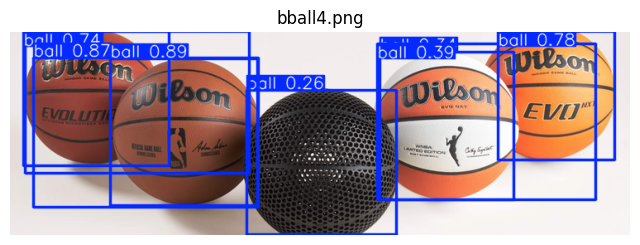


image 1/1 /test_images1/ball1.jpeg: 448x640 1 ball, 57.0ms
Speed: 3.5ms preprocess, 57.0ms inference, 2.1ms postprocess per image at shape (1, 3, 448, 640)
Number of basketballs in ball1.jpeg: 1


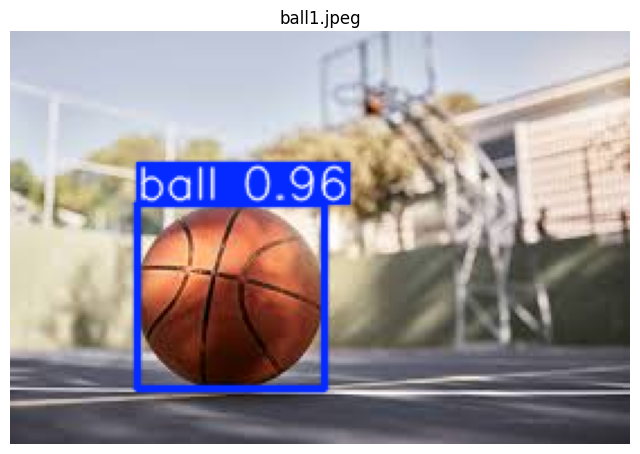


image 1/1 /test_images1/random2.webp: 288x640 (no detections), 53.2ms
Speed: 2.3ms preprocess, 53.2ms inference, 0.9ms postprocess per image at shape (1, 3, 288, 640)
Number of basketballs in random2.webp: 0


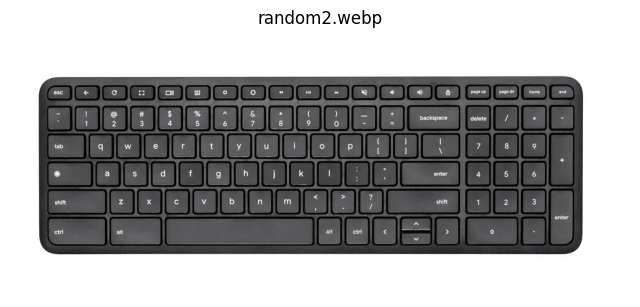


image 1/1 /test_images1/random3.jpeg: 416x640 (no detections), 56.6ms
Speed: 2.7ms preprocess, 56.6ms inference, 0.9ms postprocess per image at shape (1, 3, 416, 640)
Number of basketballs in random3.jpeg: 0


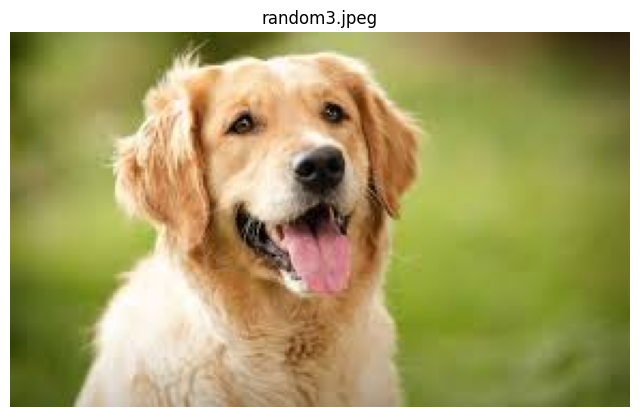

In [31]:
test_files = [img for img in test_path if img.endswith((".jpg", ".jpeg", ".png", ".webp"))]

for img in test_files:
    test_img_path = os.path.join(test_images, img)
    res = model(test_img_path)[0]

    img_w_boxes = res.plot()
    plt.figure(figsize=(8, 6))
    plt.imshow(cv2.cvtColor(img_w_boxes, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(img)

    ball_count = sum(1 for c in res.boxes.cls if c == 0)
    print(f"Number of basketballs in {img}: {ball_count}")
    plt.show()

In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
!ls runs/detect/train/weights

best.pt  last.pt


In [39]:
!cp runs/detect/train/weights/best.pt /content/drive/MyDrive/

In [40]:
!git add .

fatal: not a git repository (or any of the parent directories): .git
